In [ ]:
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install NRCLex

     |████████████████████████████████| 399kB 5.6MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-cp36-none-any.whl size=43313 sha256=6a4193620717cf619374bb6012bf4c7834c1b933b88aeb227b2b0b34e766cfad
  Stored in directory: /root/.cache/pip/wheels/17/31/64/035a8d245b4c217aeb8e8a2702d05dc91544b9c2334db72414
Successfully built NRCLex


# Introduction to NetworkX

In [ ]:
import networkx as nx

## Creating a graph

In [ ]:
G = nx.Graph()

In [ ]:
# add nodes
G.add_node(234)
G.add_node("hello")

# add an edge between nodes
G.add_edge(234,"hello")

In [ ]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [234, 'hello']
Edges: [(234, 'hello')]


In [ ]:
G[234]

AtlasView({'hello': {}})

In [ ]:
G['hello']

AtlasView({234: {}})

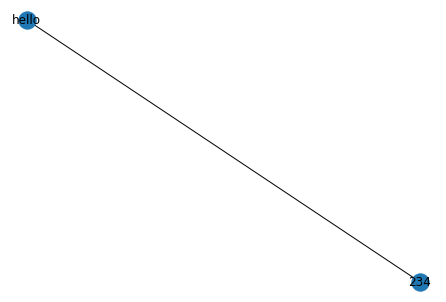

In [ ]:
nx.draw(G, with_labels=True)

## Properties on edges

In [ ]:
# Option 1
G.add_edge('Alice', 'Bob')
G['Alice']['Bob']['know'] = 10
G['Alice']['Bob']['friends'] = 5

In [ ]:
# Option 2
G.add_edges_from([('Alice', 'Bob', {'know': 10, 'friends': 5})])

In [ ]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [234, 'hello', 'Alice', 'Bob']
Edges: [(234, 'hello'), ('Alice', 'Bob')]


In [ ]:
G['Bob']

AtlasView({'Alice': {'know': 10, 'friends': 5}})

In [ ]:
G['Alice']

AtlasView({'Bob': {'know': 10, 'friends': 5}})

In [ ]:
G['Bob']['Alice']['know'] += 1

In [ ]:
G['Alice']

AtlasView({'Bob': {'know': 11, 'friends': 5}})

## Analyzing graphs

In [ ]:
G.add_edge('Alice', 'Carlos')
G.add_edge('Carlos', 'Dave')
G.add_edge('Dave', 'Bob')
G.add_edge('Alice', 'Eve')

In [ ]:
components = nx.connected_components(G)
list(components)

[{234, 'hello'}, {'Alice', 'Bob', 'Carlos', 'Dave', 'Eve'}]

In [ ]:
nx.degree(G)

DegreeView({234: 1, 'hello': 1, 'Alice': 3, 'Bob': 2, 'Carlos': 2, 'Dave': 2, 'Eve': 1})

In [ ]:
nx.degree(G,'Bob')

2

In [ ]:
nx.has_path(G, 'Alice', 'Dave')

True

In [ ]:
nx.has_path(G, 'Alice', 'hello')

False

In [ ]:
nx.shortest_path(G, 'Alice', 'Dave')

['Alice', 'Carlos', 'Dave']

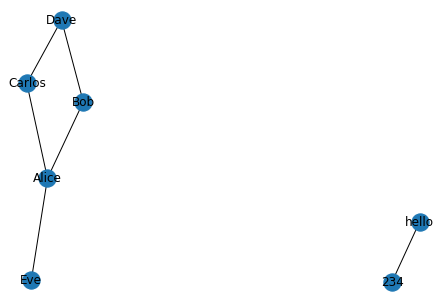

In [ ]:
nx.draw(G, with_labels=True)

## Centrality

https://networkx.org/documentation/networkx-1.10/reference/algorithms.centrality.html

In [ ]:
nx.degree_centrality(G)

{234: 0.16666666666666666,
 'Alice': 0.5,
 'Bob': 0.3333333333333333,
 'Carlos': 0.3333333333333333,
 'Dave': 0.3333333333333333,
 'Eve': 0.16666666666666666,
 'hello': 0.16666666666666666}

In [ ]:
nx.betweenness_centrality(G)

{234: 0.0,
 'Alice': 0.23333333333333334,
 'Bob': 0.06666666666666667,
 'Carlos': 0.06666666666666667,
 'Dave': 0.03333333333333333,
 'Eve': 0.0,
 'hello': 0.0}

# Loading Twitter Data

`tweets2009-06-0115.csv.zip` can be found on Quercus. 

In [ ]:
import pandas as pd

In [ ]:
# remove as this doesn't seem to work...
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# may or may not be needing to unzip mac users particularly. 
#!unzip tweets2009-06-0115.csv.zip

Archive:  tweets2009-06-0115.csv.zip
  inflating: tweets2009-06-0115.csv  
  inflating: __MACOSX/._tweets2009-06-0115.csv  


In [ ]:
#df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')
df = pd.read_csv("tweets2009-06-0115.csv", sep='\t')

In [ ]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [ ]:
df.head()

date        user          tweet
0  2009-06-01 21:43:59  burtonator  No Post Title
1  2009-06-01 21:47:23  burtonator  No Post Title
2  2009-06-02 01:15:44  burtonator  No Post Title
3  2009-06-02 05:17:52  burtonator  No Post Title
4  2009-06-02 23:58:25  burtonator  No Post Title

## Finding most common hash tags

In [ ]:
from collections import Counter

In [ ]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [ ]:
hashTagsCounter.most_common(150)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

In [ ]:
# make a new dataframe just with our hashtag
redsoxTag = df[df["tweet"].str.lower().str.contains("#redsox", na=False)].copy()

In [ ]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [ ]:
redsoxTag.iloc[4,2]

'RT @GlobeSox: Extra Bases blog: Sox draft Michael Yastrzemski - http://is.gd/Z09z #redsox'

In [ ]:
addMentionedColumn(redsoxTag)

In [ ]:
redsoxTag.head(10)

date  ...        mentioned
39      2009-06-07 02:07:42  ...               []
20460   2009-06-11 17:25:28  ...               []
34514   2009-06-11 17:50:42  ...               []
40110   2009-06-11 17:59:18  ...               []
51121   2009-06-11 18:15:23  ...       [globesox]
70355   2009-06-11 18:47:22  ...               []
95221   2009-06-11 19:26:41  ...  [hash_mlb, wbz]
112251  2009-06-11 19:52:51  ...  [globesoxextra]
122744  2009-06-11 20:13:52  ...       [lilpecan]
154427  2009-06-11 21:08:20  ...               []

[10 rows x 4 columns]

In [ ]:
# for all the tweets with your hashtag, build the mention graph
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [ ]:
redsoxGraph = mentionGraph(redsoxTag)

In [ ]:
print("# nodes:", len(redsoxGraph.nodes()))
print("# edges:", len(redsoxGraph.edges()))

# nodes: 346
# edges: 339


In [ ]:
redsoxGraph['shelley1005']

AtlasView({'geekwearsprada': {'numberMentions': 2}, 'fenway': {'numberMentions': 1}, 'm_weber': {'numberMentions': 1}, 'hackswithhaggs': {'numberMentions': 1}, 'globesox': {'numberMentions': 1}, 'sweettweet74': {'numberMentions': 1}, 'soxjetsfan': {'numberMentions': 2}})

In [ ]:
nx.draw(redsoxGraph, with_labels=False)

# Visualize Mention Graph

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Generate random positions for nodes and store them at property "pos"

In [ ]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [ ]:
addRandomPositions(redsoxGraph)

In [ ]:
nx.get_node_attributes(redsoxGraph, 'pos')['shelley1005']

(2.8996052251319226, 21.118262256695246)

### Visualize using Plot.ly scatter plots

In [ ]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=1 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
redsoxGraph.nodes['strully']['pos']

(-1.5985730554877156, 4.516295887153482)

In [ ]:
configure_plotly_browser_state()
plotNetwork(redsoxGraph)

### Visualize using node size and edge width

In [ ]:
def plotNetworkSize(graph):
    scatters=[]

    # make all the edges
    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)


    # make all the nodes
    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSize(redsoxGraph)

## Using *Colorlover* for colors

In [ ]:
import colorlover as cl
from IPython.display import HTML

In [ ]:
HTML(cl.to_html( cl.scales['9'] ))

In [ ]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

## Adding color and text based on centrality

In [ ]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(redsoxGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Closeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSizeColor(redsoxGraph)

## Using NetworkX layouts
https://networkx.org/documentation/stable//reference/drawing.html

In [ ]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, name="pos", values=posDict)

### Spring layout

In [ ]:
redsoxGraphSpring = redsoxGraph.copy()
applyLayout(redsoxGraphSpring, nx.spring_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(redsoxGraphSpring)

### Random layout

In [ ]:
redsoxGraphRandom = redsoxGraph.copy()
applyLayout(redsoxGraphRandom, nx.random_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(redsoxGraphRandom)

### Circular layout

In [ ]:
redsoxGraphCircular = redsoxGraph.copy()
applyLayout(redsoxGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(redsoxGraphCircular)

### Spectral layout

In [ ]:
redsoxGraphSpectral = redsoxGraph.copy()
applyLayout(redsoxGraphSpectral, nx.spectral_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(redsoxGraphSpectral)

# Link prediction
example modified from https://towardsdatascience.com/learning-in-graphs-with-python-part-3-8d5513eef62d

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
G_karate = nx.karate_club_graph()

n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Number of nodes :", str(n))
print("Number of edges :", str(m))
print("Number of connected components :", str(nx.number_connected_components(G_karate)))

Number of nodes : 34
Number of edges : 78
Number of connected components : 1


In [ ]:
fig = plt.figure(figsize=(7,7))
nx.draw_circular(G_karate, with_labels=True)

In [ ]:
# just a nother demo of what it looks like
plt.figure(figsize=(12,8))
nx.draw(G_karate)

In [ ]:
# This is not how you will go about it in the assignment. 
# Take a random sample of edges
edge_subset = random.sample(G_karate.edges(), int(0.25 * G_karate.number_of_edges()))
# Remove some edges
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

plt.figure(figsize=(12,8))
nx.draw(G_karate_train)

In [ ]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((m - edge_subset_size)))

Deleted :  19
Remaining :  59


In [ ]:
import heapq


def nodes_connected(u, v, G):
  return u in G.neighbors(v)

def check_results_of_prediction(pred_list, G):

  for (node1, node2, coef) in pred_list:
    val = nodes_connected(node1,node2, G)

    print(f"{node1} {node2} -> {val}")

In [ ]:
prediction_jaccard = nx.jaccard_coefficient(G_karate_train, edge_subset)

tenlargest = heapq.nlargest(10, prediction_jaccard, key = lambda x: x[2])

In [ ]:
tenlargest

[(3, 7, 0.75),
 (3, 13, 0.4),
 (4, 10, 0.3333333333333333),
 (6, 16, 0.3333333333333333),
 (24, 25, 0.3333333333333333),
 (1, 13, 0.25),
 (8, 30, 0.25),
 (29, 33, 0.2),
 (15, 32, 0.125),
 (18, 32, 0.125)]

In [ ]:
# confirming they werent there in the train net
check_results_of_prediction(tenlargest, G_karate_train)

3 7 -> False
3 13 -> False
4 10 -> False
6 16 -> False
24 25 -> False
1 13 -> False
8 30 -> False
29 33 -> False
15 32 -> False
18 32 -> False


In [ ]:
# but they all appeared in the final
check_results_of_prediction(tenlargest, G_karate)

3 7 -> True
3 13 -> True
4 10 -> True
6 16 -> True
24 25 -> True
1 13 -> True
8 30 -> True
29 33 -> True
15 32 -> True
18 32 -> True


# Complex Sentiment

In [ ]:
from nrclex import NRCLex
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
for index, tweet_data in redsoxTag.sample(n=15,random_state=15).iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)

  relative_numbers = text_object.affect_frequencies
  absolute_numbers = text_object.raw_emotion_scores

  print(tweet)
  print(relative_numbers)
  print(absolute_numbers)
  print("*"*25)

RT @Jerry_Remy #RedSox: Join Kevin Youkilis and The Remy Report. Make a difference for the kids! http://ow.ly/dOHe
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{}
*************************
#Redsox-phillies. Pitching duel thus far. Good night @ ballpark. Why does comcast block games like this sold out; only available on CSN!
{'fear': 0.3333333333333333, 'anger': 0.3333333333333333, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0, 'anticipation': 0.3333333333333333}
{'anger': 1, 'anticipation': 1, 'fear': 1}
*************************
#REDSOX Most productive K ever by Ortiz.. He got Dice-K out.. Way to go Petey
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 1.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{'positive': 1}
*************************
Getti